In [45]:
import numpy as np
import pandas as pd
print("1")

1


### https://colab.research.google.com/drive/1UWlXju4wPgwD14WgcuvGPtpcw_MX5jKl?usp=sharing#scrollTo=Za9BzQc_2eJV


In [46]:
# create a python array

a = [[0,1,2],
[1,2,3],
[2,3,4],
[3,4,5]]

#create a numpy array

a_np = np.array(a) 

print("Data:\n", a_np)
print(a_np.shape)

Data:
 [[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]
(4, 3)


In [47]:
np.random.rand(3,3)

array([[0.70499128, 0.25041823, 0.09622439],
       [0.1413697 , 0.21139996, 0.04960274],
       [0.48733169, 0.79086396, 0.86487793]])

In [48]:
np.random.randn(3,3)

array([[-0.06143324,  1.61355635, -0.04815953],
       [ 3.4919647 ,  0.64796188,  0.41058856],
       [ 1.9186595 , -1.5288163 , -2.34061883]])

In [49]:
# create a csv file to show how to create a numpy array from csv file
array_str = """c1,c2,c3
1,2,3
2,3,4
4,5,6"""
text_file = open("a.csv", "w")
text_file.write(array_str)
text_file.close()

# load array from csv
a = np.loadtxt("a.csv", skiprows=1, 
               dtype=int, delimiter=",")
print(a)

[[1 2 3]
 [2 3 4]
 [4 5 6]]


In [50]:
# download the data
data = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"

In [51]:
tips_df = pd.read_csv(data)

# show the first 5 rows
tips_df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [52]:
#adding a column
tips_df['is_weekend'] = (tips_df['day'] == "Sun") | (tips_df['day'] == "Sat")
tips_df.head(5)

,total_bill,tip,sex,smoker,day,time,size,is_weekend
0,16.99,1.01,Female,No,Sun,Dinner,2,True
1,10.34,1.66,Male,No,Sun,Dinner,3,True
2,21.01,3.50,Male,No,Sun,Dinner,3,True
3,23.68,3.31,Male,No,Sun,Dinner,2,True
4,24.59,3.61,Female,No,Sun,Dinner,4,True


In [53]:
#Filter by condition
filter_male = tips_df["sex"] == "Male"
tips_male_df = tips_df[filter_male]

tips_male_df.head(5)

,total_bill,tip,sex,smoker,day,time,size,is_weekend
1,10.34,1.66,Male,No,Sun,Dinner,3,True
2,21.01,3.50,Male,No,Sun,Dinner,3,True
3,23.68,3.31,Male,No,Sun,Dinner,2,True
5,25.29,4.71,Male,No,Sun,Dinner,4,True
6,8.77,2.00,Male,No,Sun,Dinner,2,True


In [54]:
# and combination
filter_larger5 = tips_df["tip"] > 5
tips_male_large_df = tips_df[filter_larger5 & filter_male]
tips_male_large_df.head(5)

,total_bill,tip,sex,smoker,day,time,size,is_weekend
23,39.42,7.58,Male,No,Sat,Dinner,4,True
44,30.40,5.60,Male,No,Sun,Dinner,4,True
47,32.40,6.00,Male,No,Sun,Dinner,4,True
59,48.27,6.73,Male,No,Sat,Dinner,4,True
88,24.71,5.85,Male,No,Thur,Lunch,2,False


In [55]:
# central tendancy
tip_mean = tips_df["tip"].mean()
tip_mode = tips_df["tip"].mode().iloc[0]
tip_median = tips_df["tip"].median()

print("Tips Mean:", tip_mean)
print("Tips Mode:", tip_mode)
print("Tips Median:", tip_median)


Tips Mean: 2.9982786885245902
Tips Mode: 2.0
Tips Median: 2.9


In [56]:
tips_df["tip"].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

In [57]:
# central tendancy, male
tip_mean = tips_df[filter_male]["tip"].mean()
tip_mode = tips_df[filter_male]["tip"].mode().iloc[0]
tip_median = tips_df[filter_male]["tip"].median()

print("Tips Mean:", tip_mean)
print("Tips Mode:", tip_mode)
print("Tips Median:", tip_median)

tips_df[filter_male]["tip"].describe()

Tips Mean: 3.0896178343949052
Tips Mode: 2.0
Tips Median: 3.0


count    157.000000
mean       3.089618
std        1.489102
min        1.000000
25%        2.000000
50%        3.000000
75%        3.760000
max       10.000000
Name: tip, dtype: float64

In [58]:
filter_female = tips_df["sex"] == "Female"
tips_df[filter_female]["tip"].describe()

count    87.000000
mean      2.833448
std       1.159495
min       1.000000
25%       2.000000
50%       2.750000
75%       3.500000
max       6.500000
Name: tip, dtype: float64

Missing Value

In [59]:
# origional data
tips_df.head(5)

,total_bill,tip,sex,smoker,day,time,size,is_weekend
0,16.99,1.01,Female,No,Sun,Dinner,2,True
1,10.34,1.66,Male,No,Sun,Dinner,3,True
2,21.01,3.50,Male,No,Sun,Dinner,3,True
3,23.68,3.31,Male,No,Sun,Dinner,2,True
4,24.59,3.61,Female,No,Sun,Dinner,4,True


In [60]:
# pretend to set the "size" in first 3 rows to NaN
tips_df.loc[0:2, "size"] = np.NaN

In [61]:
#compute the mean to fill "size" first 3 rows with size mean
mean_size = tips_df["size"].mean()
print("Mean Size: {:.2f}".format(mean_size))

Mean Size: 2.57


In [62]:
# fill the missing value of column "size"
tips_df["size"].fillna(mean_size, inplace=True)
tips_df.head(5)

,total_bill,tip,sex,smoker,day,time,size,is_weekend
0,16.99,1.01,Female,No,Sun,Dinner,2.568465,True
1,10.34,1.66,Male,No,Sun,Dinner,2.568465,True
2,21.01,3.50,Male,No,Sun,Dinner,2.568465,True
3,23.68,3.31,Male,No,Sun,Dinner,2.000000,True
4,24.59,3.61,Female,No,Sun,Dinner,4.000000,True


# Data Visualization

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:ylabel='tip'>

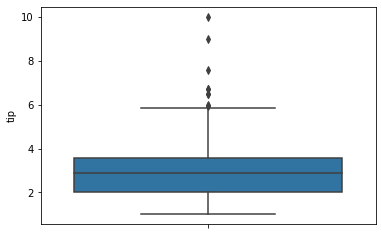

In [20]:
# boxplot all tips
sns.boxplot(data=tips_df, y = 'tip')

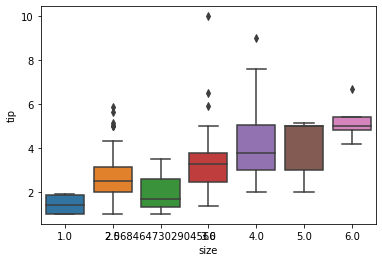

In [21]:
# boxplot all tips, group by size
sns.boxplot(data=tips_df, y = 'tip', x = 'size');

<AxesSubplot:xlabel='sex', ylabel='tip'>

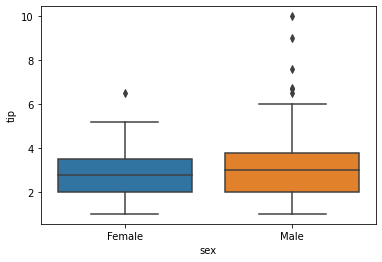

In [22]:
# boxplot all tips, group by sex
sns.boxplot(data=tips_df, y = 'tip', x = 'sex')

<AxesSubplot:xlabel='size', ylabel='total_bill'>

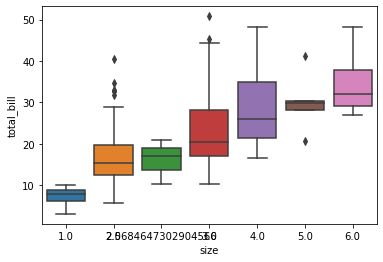

In [23]:
# boxplot all total bill, group by size
sns.boxplot(data=tips_df, y = 'total_bill', x = 'size')

# HistPlot


<AxesSubplot:xlabel='total_bill', ylabel='Count'>

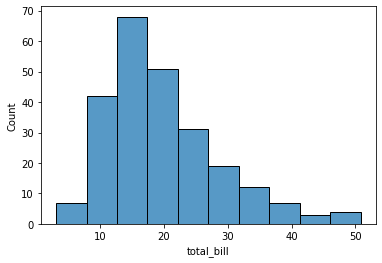

In [24]:
sns.histplot(data=tips_df, x='total_bill', bins=10)

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

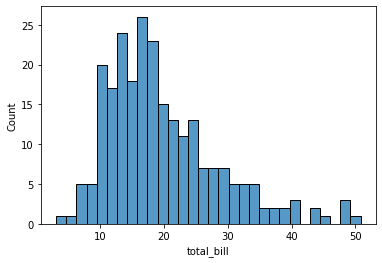

In [25]:
#increase num of bins
sns.histplot(data=tips_df, x='total_bill', bins=30)

<AxesSubplot:xlabel='total_bill', ylabel='Probability'>

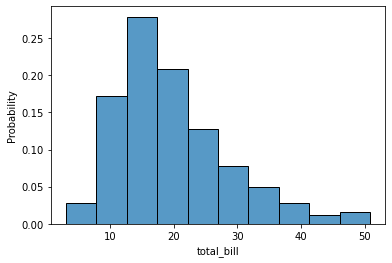

In [26]:
# default y is count, set y to probability
sns.histplot(data=tips_df, x='total_bill', bins=10, stat='probability')

# Scatter Plot


<AxesSubplot:xlabel='tip', ylabel='total_bill'>

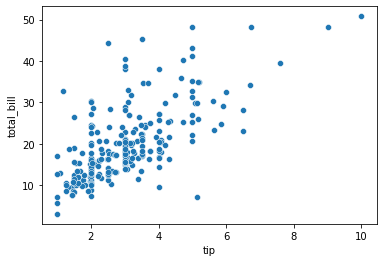

In [27]:
sns.scatterplot(data=tips_df,x='tip', y='total_bill')

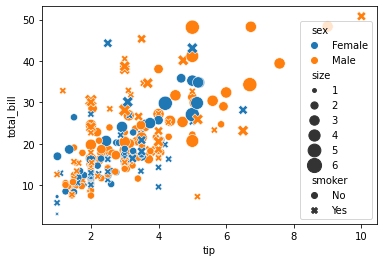

In [28]:
#hue = 'sex', use a different color for sex
sns.scatterplot(data=tips_df, x="tip", y='total_bill', hue='sex', style='smoker', size='size',sizes=(15,200));

# Correlation Coefficient
![alt text](corr.png "Title")


In [29]:
# Manual Compute
mean_1 = tips_df["total_bill"].mean()
mean_2 = tips_df["tip"].mean()
std_1 = tips_df["total_bill"].std()
std_2 = tips_df["tip"].std()

numerator = np.mean((tips_df["total_bill"] - mean_1) * (tips_df["tip"] - mean_2))
denominator = std_1*std_2
corr = numerator/denominator

print("corr between total_bill and tip is: {:.2f}".format(corr))

corr between total_bill and tip is: 0.67


In [30]:
#use the built in function
tips_df[["total_bill", "tip", "size"]].corr(method="pearson")

,total_bill,tip,size
total_bill,1.000000,0.675734,0.600217
tip,0.675734,1.000000,0.487665
size,0.600217,0.487665,1.000000


chi square test 

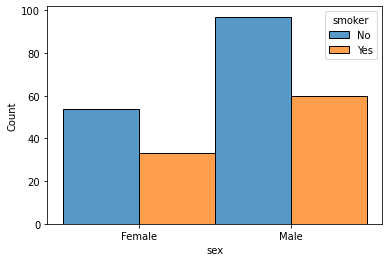

In [31]:
#hypothesis:"Sex" and "Smoker" are independant
sns.histplot(data=tips_df, x="sex", bins=10,hue="smoker", multiple="dodge");

In [32]:
from scipy import stats

# make a contingency table/cross table in pandas package
crosstab = pd.crosstab(tips_df['sex'], tips_df["smoker"])
crosstab

smoker,No,Yes
sex,,
Female,54,33
Male,97,60


In [33]:
print(stats.chi2_contingency(crosstab))

(0.008763290531773594, 0.925417020494423, 1, array([[53.84016393, 33.15983607],
       [97.15983607, 59.84016393]]))


In [34]:
chi2, p, dof, _ = stats.chi2_contingency(crosstab)
print(chi2 == 0)
print("chi^2: {:.5f}, p: {:.5f}, dof: {:.5f}".format(chi2, p, dof))


# chi^2=0.0087, p=0.92
# the hypothesis should not be reject.

False
chi^2: 0.00876, p: 0.92542, dof: 1.00000


# Hypothesis Testing: Handle Float Values

An example: Handle Float numbers 

    > event_a: Tip greter or equal to mean
    > event_b: Bill greater or equal to mean

we want to know if the tips and the bills are independant

add two columns that see if the tip and bill are above mean (true or false)


    

In [35]:
# tip_mean = tips_df['tip'].mean()
bill_mean = tips_df['total_bill'].mean()
print(f"Tip Mean: {tip_mean} \nBill Mean: {bill_mean}")


# adding two new columns that show if tip and bill is above mean or not (boolean)

tips_df['tip_ge_mean'] = tips_df['tip'] >= tip_mean
tips_df['bill_ge_mean'] = tips_df['total_bill'] >= bill_mean
tips_df.head(5)


Tip Mean: 3.0896178343949052 
Bill Mean: 19.785942622950824


,total_bill,tip,sex,smoker,day,time,size,is_weekend,tip_ge_mean,bill_ge_mean
0,16.99,1.01,Female,No,Sun,Dinner,2.568465,True,False,False
1,10.34,1.66,Male,No,Sun,Dinner,2.568465,True,False,False
2,21.01,3.50,Male,No,Sun,Dinner,2.568465,True,True,True
3,23.68,3.31,Male,No,Sun,Dinner,2.000000,True,True,True
4,24.59,3.61,Female,No,Sun,Dinner,4.000000,True,True,True


In [36]:
# make a crosstab in which tip_ge_mean false and true are against bill_ge_mean false and true

tips_bills_crosstab = pd.crosstab(tips_df['tip_ge_mean'], tips_df['bill_ge_mean'])
tips_bills_crosstab

bill_ge_mean,False,True
tip_ge_mean,,
False,120,30
True,25,69


In [37]:
tips_chi2, tips_p, tips_dof, _ = stats.chi2_contingency((crosstab))
print(f"Chi^2:{tips_chi2}\nP:{tips_p}\nDoF:{tips_dof}")

print(tips_chi2)


# pp value is supposed to be very small, so we should reject the hypothesis that event a and b are independant


Chi^2:0.008763290531773594
P:0.925417020494423
DoF:1
0.008763290531773594


<h1> Data Transformationi (normalization and discretization) <h1>

<h2>Min Max Normalization <h2>

In [38]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler


In [39]:
scaler = MinMaxScaler(feature_range=(0,1))

tips_df['tip_minmax_scaled'] = scaler.fit_transform(tips_df[['tip']])

tips_df.head(5)


,total_bill,tip,sex,smoker,day,time,size,is_weekend,tip_ge_mean,bill_ge_mean,tip_minmax_scaled
0,16.99,1.01,Female,No,Sun,Dinner,2.568465,True,False,False,0.001111
1,10.34,1.66,Male,No,Sun,Dinner,2.568465,True,False,False,0.073333
2,21.01,3.50,Male,No,Sun,Dinner,2.568465,True,True,True,0.277778
3,23.68,3.31,Male,No,Sun,Dinner,2.000000,True,True,True,0.256667
4,24.59,3.61,Female,No,Sun,Dinner,4.000000,True,True,True,0.290000


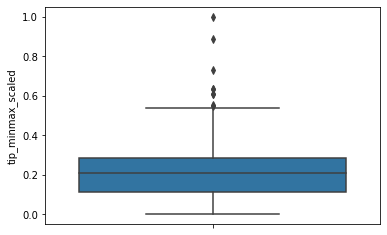

In [40]:

sns.boxplot(data=tips_df, y="tip_minmax_scaled")


<h2> KBinsDiscretizer

In [41]:
# add a new coloumn which discretizes the total bills, put in different bins. good for outliers

from sklearn.preprocessing import KBinsDiscretizer

descretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
tips_df['total_bill_10bin'] = descretizer.fit_transform(tips_df[['total_bill']])
tips_df.head(6)


,total_bill,tip,sex,smoker,day,time,size,is_weekend,tip_ge_mean,bill_ge_mean,tip_minmax_scaled,total_bill_10bin
0,16.99,1.01,Female,No,Sun,Dinner,2.568465,True,False,False,0.001111,2.0
1,10.34,1.66,Male,No,Sun,Dinner,2.568465,True,False,False,0.073333,1.0
2,21.01,3.50,Male,No,Sun,Dinner,2.568465,True,True,True,0.277778,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.000000,True,True,True,0.256667,4.0
4,24.59,3.61,Female,No,Sun,Dinner,4.000000,True,True,True,0.290000,4.0
5,25.29,4.71,Male,No,Sun,Dinner,4.000000,True,True,True,0.412222,4.0


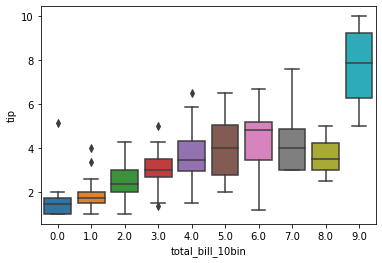

In [42]:
sns.boxplot(data=tips_df, x='total_bill_10bin', y='tip');

<h2> Z-Score Normalization

In [43]:
from sklearn.preprocessing import StandardScaler
z_scaler = StandardScaler()

tips_df['tips_z_scaled'] = z_scaler.fit_transform(tips_df[['tip']])
tips_df.head(6)

,total_bill,tip,sex,smoker,day,time,size,is_weekend,tip_ge_mean,bill_ge_mean,tip_minmax_scaled,total_bill_10bin,tips_z_scaled
0,16.99,1.01,Female,No,Sun,Dinner,2.568465,True,False,False,0.001111,2.0,-1.439947
1,10.34,1.66,Male,No,Sun,Dinner,2.568465,True,False,False,0.073333,1.0,-0.969205
2,21.01,3.50,Male,No,Sun,Dinner,2.568465,True,True,True,0.277778,3.0,0.363356
3,23.68,3.31,Male,No,Sun,Dinner,2.000000,True,True,True,0.256667,4.0,0.225754
4,24.59,3.61,Female,No,Sun,Dinner,4.000000,True,True,True,0.290000,4.0,0.443020
5,25.29,4.71,Male,No,Sun,Dinner,4.000000,True,True,True,0.412222,4.0,1.239659


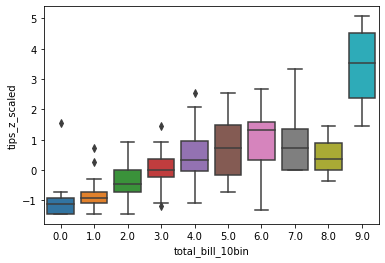

In [44]:
sns.boxplot(data=tips_df, x="total_bill_10bin", y="tips_z_scaled");